<a href="https://colab.research.google.com/github/Srishti013/Machine-Learning/blob/main/Machine-Learning/Supervised_learning/Linear_Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [22]:
!pip install word2number

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=3f8a73c15a5a87492d7b9aa8ec1be51c3b447ff6ae31190af900b476a9261d37
  Stored in directory: /root/.cache/pip/wheels/cb/f3/5a/d88198fdeb46781ddd7e7f2653061af83e7adb2a076d8886d6
Successfully built word2number


In [23]:
from word2number import w2n

# Linear Regression

In [4]:
df = pd.read_csv('canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


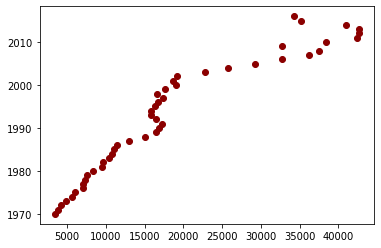

In [5]:
plt.scatter(df['per capita income (US$)'],df['year'],color='darkred')

In [6]:
capita = df['per capita income (US$)'] 
capita.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per capita income (US$), dtype: float64

In [7]:
new_df = df.drop('per capita income (US$)',axis='columns')
new_df.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [8]:
reg = linear_model.LinearRegression()
reg.fit(new_df,capita)

LinearRegression()

In [9]:
reg.coef_

array([828.46507522])

In [11]:
reg.predict([[2020]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

Text(0, 0.5, 'Year')

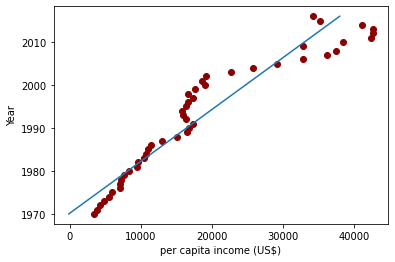

In [12]:
plt.scatter(df['per capita income (US$)'],df['year'],color='darkred')
plt.plot(reg.predict(new_df),new_df)
plt.xlabel('per capita income (US$)')
plt.ylabel('Year')

# Multivariate Linear Regression

In [94]:
df2 = pd.read_csv('hiring.csv')
df2.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [95]:
df2.isna().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [96]:
df2['experience'] = df2['experience'].fillna('zero')

In [97]:
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [98]:
df2['experience'] = df2['experience'].astype(str)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  8 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [99]:
df2.shape

(8, 4)

In [100]:
for i in range(len(df2['experience'])):
  print(str(df2['experience'][i]))

zero
zero
five
two
seven
three
ten
eleven


In [101]:
df2['experience'] = df2.experience.astype(str)

In [102]:
df2['experience'] = df2['experience'].apply(w2n.word_to_num)

In [103]:
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [104]:
df2['test_score(out of 10)'] = df2['test_score(out of 10)'].fillna(df2['test_score(out of 10)'].mean())

In [105]:
df2.isna().sum()

experience                    0
test_score(out of 10)         0
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [106]:
model = linear_model.LinearRegression()
model.fit(df2[['experience','test_score(out of 10)','interview_score(out of 10)']],df2['salary($)'])

LinearRegression()

In [107]:
print(model.predict([[2,9,6]]))
print(model.predict([[12,10,10]]))

[53290.89255945]
[92268.07227784]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


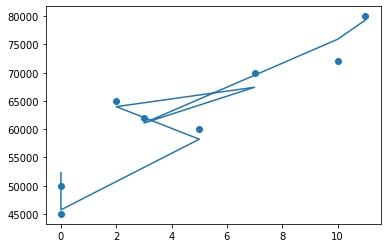

In [108]:
plt.scatter(df2['experience'],df2['salary($)'])
plt.plot(df2['experience'],model.predict(df2[['experience','test_score(out of 10)','interview_score(out of 10)']]))
plt.show()

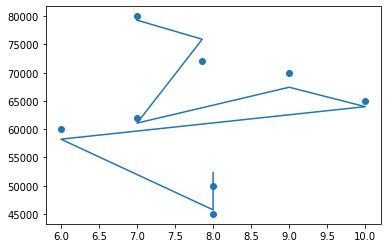

In [110]:
plt.scatter(df2['test_score(out of 10)'],df2['salary($)'])
plt.plot(df2['test_score(out of 10)'],model.predict(df2[['experience','test_score(out of 10)','interview_score(out of 10)']]))
plt.show()

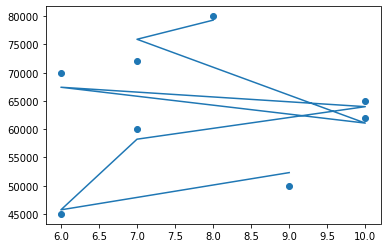

In [111]:
plt.scatter(df2['interview_score(out of 10)'],df2['salary($)'])
plt.plot(df2['interview_score(out of 10)'],model.predict(df2[['experience','test_score(out of 10)','interview_score(out of 10)']]))
plt.show()